In [1]:
import pandas as pd
import json

# Load the JSON event data, inserting relevant file path
with open('/Users/Trymso/Desktop/J-League/sb_events.json') as f:
    e_data = json.load(f)

# Load the JSON match data, inserting relevant file path
with open('/Users/Trymso/Desktop/J-League/sb_matches.json') as f:
    m_data = json.load(f)

# Convert the JSON data to a DataFrame
events_df = pd.json_normalize(e_data)
matches_df = pd.json_normalize(m_data)

In [3]:
events_df.columns = events_df.columns.str.replace(".name", "", regex=True)
events_df.columns = events_df.columns.str.replace("[.]", "_", regex=True)

matches_df.columns = matches_df.columns.str.replace(".name", "", regex=True)
matches_df.columns = matches_df.columns.str.replace("[.]", "_", regex=True)

In [5]:
events_df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'related_events', 'location',
       ...
       'shot_saved_to_post', 'goalkeeper_shot_saved_to_post',
       'shot_shot_goal_assist', 'shot_follows_dribble', 'goalkeeper_lost_out',
       'goalkeeper_lost_in_play', 'player_off_permanent', 'shot_redirect',
       'goalkeeper_success_out', 'goalkeeper_success_in_play'],
      dtype='object', length=162)

In [7]:
columns_list = events_df.columns.tolist()
print(columns_list)

['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 'duration', 'related_events', 'location', 'type_id', 'type', 'possession_team_id', 'possession_team', 'play_pattern_id', 'play_pattern', 'team_id', 'team', 'tactics_formation', 'tactics_lineup', 'pass_end_location', 'carry_end_location', 'shot_end_location', 'shot_freeze_frame', 'goalkeeper_end_location', 'match_id', 'obv_for_after', 'obv_for_before', 'obv_for_net', 'obv_against_after', 'obv_against_before', 'obv_against_net', 'obv_total_net', 'player_id', 'player', 'position_id', 'position', 'pass_length', 'pass_angle', 'pass_pass_success_probability', 'pass_recipient_id', 'pass_recipient', 'pass_height_id', 'pass_height', 'pass_body_part_id', 'pass_body_part', 'pass_type_id', 'pass_type', 'pass_pass_cluster_id', 'pass_pass_cluster_label', 'pass_pass_cluster_probability', 'under_pressure', 'pass_aerial_won', 'pass_outcome_id', 'pass_outcome', 'duel_type_id', 'duel_type', 'clearance_right_foot', 'clearance_body_pa

In [9]:
# Filter columns with 'location' in their names
location_columns = [col for col in events_df.columns if 'location' in col]

# Print the values from the location columns
print(events_df[location_columns])

             location pass_end_location carry_end_location shot_end_location  \
0                None              None               None              None   
1                None              None               None              None   
2                None              None               None              None   
3                None              None               None              None   
4            [60, 40]      [39.5, 32.6]               None              None   
...               ...               ...                ...               ...   
1244336  [80.3, 22.6]              None       [74.1, 25.2]              None   
1244337  [40.7, 55.5]              None               None              None   
1244338  [74.1, 25.2]      [71.9, 14.1]               None              None   
1244339          None              None               None              None   
1244340          None              None               None              None   

        goalkeeper_end_location  
0    

In [11]:
events_df.shot_outcome.unique()

array([nan, 'Off T', 'Goal', 'Saved', 'Blocked', 'Saved Off Target',
       'Post', 'Wayward', 'Saved to Post'], dtype=object)

# Goals

In [14]:
# Filter for goals
goals_df = events_df[(events_df['type'] == 'Shot') & (events_df['shot_outcome'] == 'Goal')]

# Group by player and team, count goals
top_scorers = goals_df.groupby(['team', 'player']).size().reset_index(name='goals')

# Sort by goals in descending order
top_scorers = top_scorers.sort_values(by='goals', ascending=False)

# Display the result
top_scorers.head(10)


,team,player,goals
292,Yokohama F. Marinos,Anderson José Lopes de Souza,24
35,Cerezo Osaka,Leonardo de Sousa Pereira,21
141,Kawasaki Frontale,Shin Yamada,19
101,Júbilo Iwata,Ryo Germain,19
119,Kashima Antlers,Yuma Suzuki,15
88,Gamba Osaka,Takashi Usami,12
289,Vissel Kobe,Yoshinori Muto,12
274,Urawa Reds,Thiago Santos Santana,12
187,Sagan Tosu,Marcelo Ryan Silvestre dos Santos,12
291,Vissel Kobe,Yūya Ōsako,11


In [16]:
#Adding xG numbers

# Filter for goals
goals_analysis_df = events_df[(events_df['type'] == 'Shot') & (events_df['shot_outcome'] == 'Goal')]

# Group by player and team, count goals and sum xG columns
xg_analysis_df = goals_analysis_df.groupby(['team', 'player']).agg(
    total_goals=('shot_outcome', 'count'),  # Count the number of goals
    total_statsbomb_xg=('shot_statsbomb_xg', 'sum'),  # Sum the xG values from shot_statsbomb_xg
    total_shot_execution_xg=('shot_shot_execution_xg', 'sum')  # Sum the xG values from shot_shot_execution_xg
).reset_index()

# Sort by total_statsbomb_xg in descending order
xg_analysis_df = xg_analysis_df.sort_values(by='total_statsbomb_xg', ascending=False)

# Display the result
xg_analysis_df

,team,player,total_goals,total_statsbomb_xg,total_shot_execution_xg
292,Yokohama F. Marinos,Anderson José Lopes de Souza,24,10.7740,15.1159
35,Cerezo Osaka,Leonardo de Sousa Pereira,21,10.0088,15.4518
101,Júbilo Iwata,Ryo Germain,19,7.1568,10.6114
141,Kawasaki Frontale,Shin Yamada,19,6.9867,11.4441
119,Kashima Antlers,Yuma Suzuki,15,6.4964,9.8683
...,...,...,...,...,...
49,Consadole Sapporo,Katsuyuki Tanaka,1,0.0132,0.0618
129,Kashiwa Reysol,Tomoki Takamine,1,0.0097,0.0249
130,Kashiwa Reysol,Tomoya Inukai,1,0.0062,0.0274
278,Vissel Kobe,Gotoku Sakai,1,0.0048,0.0013


In [18]:
# Filter for all shots (not just goals)
shots_df = events_df[events_df['type'] == 'Shot']

# Group by player and team, count goals, and sum xG columns for all shots
xg_analysis_full_df = shots_df.groupby(['team', 'player']).agg(
    total_goals=('shot_outcome', lambda x: (x == 'Goal').sum()),  # Count only goals
    total_statsbomb_xg=('shot_statsbomb_xg', 'sum'),  # Sum xG values for all shots
    total_shot_execution_xg=('shot_shot_execution_xg', 'sum')  # Sum post-shot xG for all shots
).reset_index()

# Sort by total_statsbomb_xg in descending order
xg_analysis_full_df = xg_analysis_full_df.sort_values(by='total_goals', ascending=False)

# Display the result
xg_analysis_full_df.head(10)


,team,player,total_goals,total_statsbomb_xg,total_shot_execution_xg
494,Yokohama F. Marinos,Anderson José Lopes de Souza,24,23.0836,23.8014
60,Cerezo Osaka,Leonardo de Sousa Pereira,21,22.4625,21.3974
244,Kawasaki Frontale,Shin Yamada,19,14.8568,16.4342
176,Júbilo Iwata,Ryo Germain,19,13.1130,14.6839
200,Kashima Antlers,Yuma Suzuki,15,11.2368,13.7804
467,Urawa Reds,Thiago Santos Santana,12,11.1416,10.4051
149,Gamba Osaka,Takashi Usami,12,8.6891,9.5258
489,Vissel Kobe,Yoshinori Muto,12,12.2100,13.0580
323,Sagan Tosu,Marcelo Ryan Silvestre dos Santos,12,10.0811,9.7277
264,Kyoto Sanga FC,Rafael Elias da Silva,11,8.8251,11.4281


In [348]:
# Step 1: Filter for goals
goals_analysis_df = events_df[(events_df['type'] == 'Shot') & (events_df['shot_outcome'] == 'Goal')]

# Step 2: Group by player and team, count goals, and sum xG columns
xg_analysis_df = goals_analysis_df.groupby(['team', 'player']).agg(
    total_goals=('shot_outcome', 'count'),  # Count the number of goals
    total_statsbomb_xg=('shot_statsbomb_xg', 'sum'),  # Sum the StatsBomb xG values
    total_shot_execution_xg=('shot_shot_execution_xg', 'sum')  # Sum the Shot Execution xG values
).reset_index()

# Step 3: Calculate total minutes played using match_id
minutes_per_match = events_df.groupby(['team', 'player', 'match_id'])['minute'].max().reset_index()
total_minutes_played = minutes_per_match.groupby(['team', 'player'])['minute'].sum().reset_index()
total_minutes_played.rename(columns={'minute': 'total_minutes'}, inplace=True)

# Step 4: Merge goals and minutes into one DataFrame
xg_analysis_df = xg_analysis_df.merge(total_minutes_played, on=['team', 'player'], how='left')

# Step 5: Filter out players with less than 900 minutes
xg_analysis_df = xg_analysis_df[xg_analysis_df['total_minutes'] >= 900]

# Step 6: Calculate goals per 90 minutes
xg_analysis_df['goals_per_90'] = (xg_analysis_df['total_goals'] / xg_analysis_df['total_minutes']) * 90

# Step 7: Sort by goals per 90 in descending order
xg_analysis_df = xg_analysis_df.sort_values(by='goals_per_90', ascending=False)

# Display the top players
xg_analysis_df.head(10)


,team,player,total_goals,total_statsbomb_xg,total_shot_execution_xg,total_minutes,goals_per_90
149,Kyoto Sanga FC,Rafael Elias da Silva,11,4.3336,7.5422,1341,0.738255
210,Sanfrecce Hiroshima,Tolgay Ali Arslan,8,2.4859,3.9579,1125,0.640000
292,Yokohama F. Marinos,Anderson José Lopes de Souza,24,10.7740,15.1159,3411,0.633245
101,Júbilo Iwata,Ryo Germain,19,7.1568,10.6114,2967,0.576340
35,Cerezo Osaka,Leonardo de Sousa Pereira,21,10.0088,15.4518,3441,0.549259
141,Kawasaki Frontale,Shin Yamada,19,6.9867,11.4441,3235,0.528594
212,Sanfrecce Hiroshima,Yuki Ohashi,10,3.0775,5.4872,1961,0.458950
187,Sagan Tosu,Marcelo Ryan Silvestre dos Santos,12,2.7813,4.5718,2430,0.444444
119,Kashima Antlers,Yuma Suzuki,15,6.4964,9.8683,3280,0.411585
203,Sanfrecce Hiroshima,Pieros Soteriou,9,2.8221,6.2249,1995,0.406015


In [350]:
# Step 1: Filter for all shots
shots_df = events_df[events_df['type'] == 'Shot']

# Step 2: Group by player and team, count goals, and sum xG columns for all shots
xg_analysis_full_df = shots_df.groupby(['team', 'player']).agg(
    total_goals=('shot_outcome', lambda x: (x == 'Goal').sum()),  # Count only goals
    total_statsbomb_xg=('shot_statsbomb_xg', 'sum'),  # Sum xG values for all shots
    total_shot_execution_xg=('shot_shot_execution_xg', 'sum')  # Sum post-shot xG for all shots
).reset_index()

# Step 3: Calculate total minutes played using match_id
minutes_per_match = events_df.groupby(['team', 'player', 'match_id'])['minute'].max().reset_index()
total_minutes_played = minutes_per_match.groupby(['team', 'player'])['minute'].sum().reset_index()
total_minutes_played.rename(columns={'minute': 'total_minutes'}, inplace=True)

# Step 4: Merge shots data with minutes played
xg_analysis_full_df = xg_analysis_full_df.merge(total_minutes_played, on=['team', 'player'], how='left')

# Step 5: Filter out players with less than 900 minutes
xg_analysis_full_df = xg_analysis_full_df[xg_analysis_full_df['total_minutes'] >= 900]

# Step 6: Calculate goals per 90 minutes
xg_analysis_full_df['goals_per_90'] = (xg_analysis_full_df['total_goals'] / xg_analysis_full_df['total_minutes']) * 90

# Step 7: Sort by goals per 90 in descending order
xg_analysis_full_df = xg_analysis_full_df.sort_values(by='goals_per_90', ascending=False)

# Display the top players
xg_analysis_full_df.head(10)


,team,player,total_goals,total_statsbomb_xg,total_shot_execution_xg,total_minutes,goals_per_90
264,Kyoto Sanga FC,Rafael Elias da Silva,11,8.8251,11.4281,1341,0.738255
363,Sanfrecce Hiroshima,Tolgay Ali Arslan,8,3.5475,4.3955,1125,0.640000
494,Yokohama F. Marinos,Anderson José Lopes de Souza,24,23.0836,23.8014,3411,0.633245
176,Júbilo Iwata,Ryo Germain,19,13.1130,14.6839,2967,0.576340
60,Cerezo Osaka,Leonardo de Sousa Pereira,21,22.4625,21.3974,3441,0.549259
244,Kawasaki Frontale,Shin Yamada,19,14.8568,16.4342,3235,0.528594
368,Sanfrecce Hiroshima,Yuki Ohashi,10,7.9061,10.7832,1961,0.458950
323,Sagan Tosu,Marcelo Ryan Silvestre dos Santos,12,10.0811,9.7277,2430,0.444444
200,Kashima Antlers,Yuma Suzuki,15,11.2368,13.7804,3280,0.411585
354,Sanfrecce Hiroshima,Pieros Soteriou,9,7.7992,8.7365,1995,0.406015


# Assists

In [21]:
# Filter for goals
assists_df = events_df[(events_df['type'] == 'Pass') & (events_df['pass_goal_assist'] == True)]

# Group by player and team, count assists
top_assisters = assists_df.groupby(['team', 'player']).size().reset_index(name='assists')

# Sort by goals in descending order
top_assisters = top_assisters.sort_values(by='assists', ascending=False)

# Display the result
top_assisters.head(20)

,team,player,assists
35,Cerezo Osaka,Lucas Fernandes,10
268,Yokohama F. Marinos,Yan Matheus Santos Souza,8
74,Gamba Osaka,Takashi Usami,8
109,Kashiwa Reysol,Matheus Gonçalves Sávio,7
101,Kashima Antlers,Yuma Suzuki,7
98,Kashima Antlers,Shintaro Nago,7
253,Vissel Kobe,Yūya Ōsako,7
251,Vissel Kobe,Yoshinori Muto,7
179,Sanfrecce Hiroshima,Shunki Higashi,7
247,Vissel Kobe,Ryo Hatsuse,7


In [338]:
events_df.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Duel', 'Block', 'Clearance', 'Pressure', 'Ball Recovery',
       'Injury Stoppage', 'Foul Committed', 'Foul Won', 'Shot',
       'Goal Keeper', 'Interception', 'Dispossessed', 'Dribble',
       'Dribbled Past', 'Miscontrol', 'Substitution', 'Tactical Shift',
       'Referee Ball-Drop', '50/50', 'Half End', 'Shield', 'Player Off',
       'Player On', 'Bad Behaviour', 'Offside', 'Error', 'Own Goal For',
       'Own Goal Against'], dtype=object)

In [336]:
# Filter for pressures made by players in 'Center Forward' position and in the opponent's half
# Safely split the 'location' column into 'x' and 'y' coordinates
events_df[['x', 'y']] = events_df['location'].apply(
    lambda loc: pd.Series(loc) if isinstance(loc, list) and len(loc) == 2 else pd.Series([None, None])
)

pressure_df = events_df[
    (events_df['position'] == 'Center Forward') & 
    (events_df['type'] == 'Pressure') & 
    (events_df['x'] > 60)  # Opponent's half
]

# Group by player and team, count pressures
top_pressers = pressure_df.groupby(['team', 'player']).size().reset_index(name='pressures')

# Sort by pressures in descending order
top_pressers = top_pressers.sort_values(by='pressures', ascending=False)

# Display the top 10 pressers
top_pressers.head(15)


,team,player,pressures
10,Avispa Fukuoka,Wellington Luis de Sousa,388
12,Cerezo Osaka,Leonardo de Sousa Pereira,377
109,Vissel Kobe,Yūya Ōsako,375
110,Yokohama F. Marinos,Anderson José Lopes de Souza,344
103,Urawa Reds,Thiago Santos Santana,296
99,Tokyo Verdy,Yudai Kimura,270
45,Kashima Antlers,Yuma Suzuki,259
72,Sagan Tosu,Marcelo Ryan Silvestre dos Santos,250
59,Kyoto Sanga FC,Taichi Hara,214
34,Gamba Osaka,Takashi Usami,211


In [342]:
pressure_df = events_df[
    (events_df['position'] == 'Center Forward') & 
    (events_df['type'] == 'Ball Recovery') & 
    (events_df['x'] > 60)  # Opponent's half
]

# Group by player and team, count pressures
top_pressers = pressure_df.groupby(['team', 'player']).size().reset_index(name='pressures')

# Sort by pressures in descending order
top_pressers = top_pressers.sort_values(by='pressures', ascending=False)

# Display the top 10 pressers
top_pressers.head(15)

,team,player,pressures
75,Vissel Kobe,Yūya Ōsako,83
76,Yokohama F. Marinos,Anderson José Lopes de Souza,66
70,Urawa Reds,Thiago Santos Santana,52
8,Cerezo Osaka,Leonardo de Sousa Pereira,52
40,Kyoto Sanga FC,Taichi Hara,49
60,Tokyo,Diego Queiroz de Oliveira,47
6,Avispa Fukuoka,Shahab Zahedi,42
48,Sagan Tosu,Marcelo Ryan Silvestre dos Santos,42
20,Gamba Osaka,Takashi Usami,42
28,Kashima Antlers,Yuma Suzuki,40


In [346]:
# Filter for ball recoveries made by players in 'Center Forward' position and in the opponent's half
pressure_df = events_df[
    (events_df['position'] == 'Center Forward') & 
    (events_df['type'] == 'Ball Recovery') & 
    (events_df['x'] > 60)  # Opponent's half
]

# Group by player and team, count pressures
top_pressers = pressure_df.groupby(['team', 'player']).size().reset_index(name='pressures')

# Calculate total minutes played by linking match_id
minutes_per_match = events_df.groupby(['team', 'player', 'match_id'])['minute'].max().reset_index()
total_minutes_played = minutes_per_match.groupby(['team', 'player'])['minute'].sum().reset_index()
total_minutes_played.rename(columns={'minute': 'total_minutes'}, inplace=True)

# Merge pressures with minutes played
top_pressers = top_pressers.merge(total_minutes_played, on=['team', 'player'], how='left')

# Filter out players with insufficient minutes (e.g., less than 900 minutes)
top_pressers = top_pressers[top_pressers['total_minutes'] >= 900]

# Calculate pressures per 90 minutes
top_pressers['pressures_per_90'] = (top_pressers['pressures'] / top_pressers['total_minutes']) * 90

# Sort by pressures per 90 in descending order
top_pressers = top_pressers.sort_values(by='pressures_per_90', ascending=False)

# Display the top 15 pressers
top_pressers.head(15)


,team,player,pressures,total_minutes,pressures_per_90
37,Kyoto Sanga FC,Rafael Elias da Silva,35,1341,2.348993
75,Vissel Kobe,Yūya Ōsako,83,3203,2.332189
76,Yokohama F. Marinos,Anderson José Lopes de Souza,66,3411,1.741425
60,Tokyo,Diego Queiroz de Oliveira,47,2509,1.685931
48,Sagan Tosu,Marcelo Ryan Silvestre dos Santos,42,2430,1.555556
6,Avispa Fukuoka,Shahab Zahedi,42,2475,1.527273
70,Urawa Reds,Thiago Santos Santana,52,3187,1.468466
8,Cerezo Osaka,Leonardo de Sousa Pereira,52,3441,1.360070
40,Kyoto Sanga FC,Taichi Hara,49,3437,1.283096
20,Gamba Osaka,Takashi Usami,42,3050,1.239344


# Goals and Assists

In [24]:
# Merge the two DataFrames on 'team' and 'player'
goals_and_assists = pd.merge(
    top_scorers, 
    top_assisters, 
    on=['team', 'player'], 
    how='outer',  # Include players who might be in one but not the other
    suffixes=('_goals', '_assists')  # Add suffixes to distinguish columns
)

# Fill NaN values with 0
goals_and_assists = goals_and_assists.fillna(0)

# Create a new column for total goals and assists
goals_and_assists['goals_and_assists'] = (
    goals_and_assists['goals'] + goals_and_assists['assists']
)

# Sort by 'goals_and_assists' in descending order
goals_and_assists = goals_and_assists.sort_values(by='goals_and_assists', ascending=False)

# Display the result
goals_and_assists.head(15)


,team,player,goals,assists,goals_and_assists
0,Yokohama F. Marinos,Anderson José Lopes de Souza,24.0,2.0,26.0
1,Cerezo Osaka,Leonardo de Sousa Pereira,21.0,1.0,22.0
2,Kawasaki Frontale,Shin Yamada,19.0,3.0,22.0
4,Kashima Antlers,Yuma Suzuki,15.0,7.0,22.0
5,Gamba Osaka,Takashi Usami,12.0,8.0,20.0
3,Júbilo Iwata,Ryo Germain,19.0,0.0,19.0
6,Vissel Kobe,Yoshinori Muto,12.0,7.0,19.0
9,Vissel Kobe,Yūya Ōsako,11.0,7.0,18.0
22,Kashiwa Reysol,Matheus Gonçalves Sávio,9.0,7.0,16.0
20,Sanfrecce Hiroshima,Mutsuki Kato,9.0,6.0,15.0


# OBV 

In [27]:
# Filter for goals
obv_df = events_df[(events_df['type'] == 'Pass') & (events_df['pass_goal_assist'] == True)]

# Group by player and team, count assists
top_assisters = assists_df.groupby(['team', 'player']).size().reset_index(name='assists')

# Sort by goals in descending order
top_assisters = top_assisters.sort_values(by='assists', ascending=False)

# Display the result
top_assisters.head(10)

,team,player,assists
35,Cerezo Osaka,Lucas Fernandes,10
268,Yokohama F. Marinos,Yan Matheus Santos Souza,8
74,Gamba Osaka,Takashi Usami,8
109,Kashiwa Reysol,Matheus Gonçalves Sávio,7
101,Kashima Antlers,Yuma Suzuki,7
98,Kashima Antlers,Shintaro Nago,7
253,Vissel Kobe,Yūya Ōsako,7
251,Vissel Kobe,Yoshinori Muto,7
179,Sanfrecce Hiroshima,Shunki Higashi,7
247,Vissel Kobe,Ryo Hatsuse,7


In [29]:
events_df.obv_total_net.unique()

array([        nan,  5.0000e-03, -2.0000e-04, ..., -6.4196e-06,
        2.4214e-06, -5.2536e-06])

In [31]:
events_df.position.unique()

array([nan, 'Left Center Midfield', 'Left Center Back', 'Right Wing Back',
       'Left Back', 'Center Defensive Midfield', 'Right Midfield',
       'Right Center Forward', 'Left Wing Back', 'Goalkeeper',
       'Left Midfield', 'Right Center Midfield', 'Left Center Forward',
       'Right Center Back', 'Right Defensive Midfield',
       'Left Defensive Midfield', 'Center Back', 'Right Back',
       'Center Forward', 'Left Wing', 'Center Attacking Midfield',
       'Right Wing', 'Left Attacking Midfield',
       'Right Attacking Midfield', 'Substitute'], dtype=object)

In [382]:
# Group by team and player, summing obv_for_net over all games
aggregated_obv_df = events_df[events_df['position'] == 'Center Forward'].groupby(['team', 'player']).agg(
    total_obv_net=('obv_total_net', 'sum')  # Sum the obv_for_net column
).reset_index()

# Sort by the aggregated total_obv_net in descending order
aggregated_obv_df = aggregated_obv_df.sort_values(by='total_obv_net', ascending=False)

# Display the top 10 results
aggregated_obv_df.head()


,team,player,total_obv_net
62,Kyoto Sanga FC,Rafael Elias da Silva,5.485300
56,Kawasaki Frontale,Shin Yamada,4.359095
33,Gamba Osaka,Isa Sakamoto,3.035400
37,Gamba Osaka,Takashi Usami,3.023890
48,Kashima Antlers,Yuma Suzuki,2.847093


In [222]:
# Group by team and player, summing obv_for_net over all games
aggregated_obv_df = events_df[events_df['position'] == 'Center Attacking Midfield'].groupby(['team', 'player']).agg(
    total_obv_net=('obv_total_net', 'sum')  # Sum the obv_for_net column
).reset_index()

# Sort by the aggregated total_obv_net in descending order
aggregated_obv_df = aggregated_obv_df.sort_values(by='total_obv_net', ascending=False)

# Display the top 10 results
aggregated_obv_df.head()

,team,player,total_obv_net
58,Kashima Antlers,Shintaro Nago,3.173891
73,Kawasaki Frontale,Yasuto Wakizaka,2.444508
116,Tokyo,Ryotaro Araki,1.830813
132,Urawa Reds,Ryoma Watanabe,1.224495
39,Gamba Osaka,Kota Yamada,1.026103


In [35]:
#adding other midfield positions 

# Define the positions to include
positions_to_include = [
    'Center Attacking Midfield', 
    'Right Center Midfield', 
    'Left Attacking Midfield', 
    'Right Attacking Midfield', 
    'Right Midfield', 
    'Left Midfield'
]

# Filter events for the specified positions
filtered_events = events_df[events_df['position'].isin(positions_to_include)]

# Group by team and player, summing obv_for_net over all games
aggregated_obv_df = filtered_events.groupby(['team', 'position', 'player']).agg(
    total_obv_net=('obv_for_net', 'sum')  # Sum the obv_total_net column
).reset_index()

# Sort by the aggregated total_obv_net in descending order
aggregated_obv_df = aggregated_obv_df.sort_values(by='total_obv_net', ascending=False)

# Display the top 10 results
aggregated_obv_df.head(20)


,team,position,player,total_obv_net
291,Kashiwa Reysol,Left Midfield,Matheus Gonçalves Sávio,9.648885
42,Avispa Fukuoka,Right Attacking Midfield,Kazuya Konno,3.791903
473,Sanfrecce Hiroshima,Right Attacking Midfield,Mutsuki Kato,3.584600
305,Kashiwa Reysol,Right Midfield,Takuya Shimamura,3.150902
90,Cerezo Osaka,Right Midfield,Lucas Fernandes,2.953608
251,Kashima Antlers,Center Attacking Midfield,Shintaro Nago,2.846479
122,Consadole Sapporo,Right Attacking Midfield,Yoshiaki Komai,2.605615
355,Kyoto Sanga FC,Right Center Midfield,Sota Kawasaki,2.493402
321,Kawasaki Frontale,Left Midfield,Márcio Augusto da Silva Barbosa,2.490106
313,Kawasaki Frontale,Center Attacking Midfield,Yasuto Wakizaka,2.332401


In [64]:
centre_backs = ['Left Center Back', 'Right Center Back', 'Center Back']

full_backs = ['Right Wing Back', 'Left Back', 'Left Wing Back', 'Right Back']

def_midfield = ['Center Defensive Midfield', 'Right Defensive Midfield', 'Left Defensive Midfield']

midfielder_positions = [
    'Center Attacking Midfield', 'Right Center Midfield', 'Left Attacking Midfield',
    'Right Attacking Midfield', 'Right Midfield', 'Left Midfield'
]

attacking_midfield = ['Center Attacking Midfield']
center_forward = ['Center Forward']

# Filter events for the specified positions
filtered_events = events_df[events_df['position'].isin(full_backs)]

# Group by team and player, summing obv_for_net over all games
aggregated_obv_df = filtered_events.groupby(['team', 'position', 'player']).agg(
    total_obv_net=('obv_for_net', 'sum')  # Sum the obv_total_net column
).reset_index()

# Sort by the aggregated total_obv_net in descending order
aggregated_obv_df = aggregated_obv_df.sort_values(by='total_obv_net', ascending=False)

# Display the top 10 results
aggregated_obv_df.head(10)

,team,position,player,total_obv_net
360,Vissel Kobe,Left Back,Ryo Hatsuse,10.437202
265,Sanfrecce Hiroshima,Left Wing Back,Shunki Higashi,8.501517
272,Sanfrecce Hiroshima,Right Wing Back,Naoto Arai,8.390173
131,Kashima Antlers,Left Back,Koki Anzai,8.248817
137,Kashima Antlers,Right Back,Kimito Nono,8.222998
101,Gamba Osaka,Left Back,Keisuke Kurokawa,7.152502
192,Kyoto Sanga FC,Right Back,Shinnosuke Fukuda,7.058394
160,Kawasaki Frontale,Left Back,Sota Miura,6.368297
9,Albirex Niigata,Right Back,Soya Fujiwara,6.117185
84,FC Machida Zelvia,Left Back,Kotaro Hayashi,5.961102


In [106]:
events_df.duel_type.unique()

array([nan, 'Aerial Lost', 'Tackle'], dtype=object)

In [72]:
events_df.duel_outcome.unique()

array([nan, 'Lost In Play', 'Lost Out', 'Success In Play', 'Won',
       'Success Out'], dtype=object)

In [146]:
# Step 1: Calculate total minutes played for each player across matches
minutes_per_match = events_df.groupby(['player', 'team', 'match_id'])['minute'].max().reset_index()
total_minutes_played = minutes_per_match.groupby(['player', 'team'])['minute'].sum().reset_index()
total_minutes_played.rename(columns={'minute': 'total_minutes'}, inplace=True)

# Step 2: Filter players who have played at least 900 minutes (10 full games)
eligible_players = total_minutes_played[total_minutes_played['total_minutes'] >= 900]

# Step 3: Filter duels for center-backs and relevant outcomes
duels_df = events_df[
    (events_df['position'] == 'Center Back') &  # Ensure position is center back
    (events_df['type'] == 'Duel') &            # Ensure event type is Duel
    (events_df['duel_outcome'].isin(['Success In Play', 'Won', 'Lost In Play', 'Lost Out']))  # Relevant outcomes
]

# Merge to keep only eligible players
duels_df = duels_df.merge(eligible_players[['player', 'team']], on=['player', 'team'], how='inner')

# Step 4: Group by player and team to calculate duel statistics
duel_stats = duels_df.groupby(['team', 'player']).agg(
    total_duels=('duel_outcome', 'size'),  # Total number of duels
    duels_won=('duel_outcome', lambda x: (x.isin(['Success In Play', 'Won']).sum()))  # Count successful duels
).reset_index()

# Step 5: Merge total minutes to calculate per 90 stats
duel_stats = duel_stats.merge(total_minutes_played[['player', 'team', 'total_minutes']], on=['player', 'team'], how='inner')

# Step 6: Filter players with at least 10 total duels
duel_stats = duel_stats[duel_stats['total_duels'] >= 10]

# Step 7: Calculate duels won percentage and duels won per 90 minutes
duel_stats['duels_won_percentage'] = (duel_stats['duels_won'] / duel_stats['total_duels']) * 100
duel_stats['duels_won_per_90'] = (duel_stats['duels_won'] / duel_stats['total_minutes']) * 90

# Step 8: Sort by duels won per 90 minutes in descending order
top_duelers = duel_stats.sort_values(by='duels_won_per_90', ascending=False)

# Display the top players
top_duelers.head(10)


,team,player,total_duels,duels_won,total_minutes,duels_won_percentage,duels_won_per_90
5,Consadole Sapporo,Daihachi Okamura,71,48,2981,67.605634,1.449178
20,Sanfrecce Hiroshima,Hayato Araki,32,20,2391,62.500000,0.752823
1,Avispa Fukuoka,Tatsuki Nara,16,8,1031,50.000000,0.698351
16,Nagoya Grampus,Chang-Rae Ha,26,15,2083,57.692308,0.648104
21,Sanfrecce Hiroshima,Shuto Nakano,29,17,3481,58.620690,0.439529
17,Nagoya Grampus,Kennedy Egbus Mikuni,24,14,3212,58.333333,0.392279
25,Shonan Bellmare,Min-Tae Kim,24,11,2870,45.833333,0.344948
0,Avispa Fukuoka,Masaya Tashiro,13,7,3328,53.846154,0.189303
26,Tokyo Verdy,Kaito Chida,14,4,2492,28.571429,0.144462


In [148]:
events_df.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Duel', 'Block', 'Clearance', 'Pressure', 'Ball Recovery',
       'Injury Stoppage', 'Foul Committed', 'Foul Won', 'Shot',
       'Goal Keeper', 'Interception', 'Dispossessed', 'Dribble',
       'Dribbled Past', 'Miscontrol', 'Substitution', 'Tactical Shift',
       'Referee Ball-Drop', '50/50', 'Half End', 'Shield', 'Player Off',
       'Player On', 'Bad Behaviour', 'Offside', 'Error', 'Own Goal For',
       'Own Goal Against'], dtype=object)

In [160]:
# Step 1: Calculate total minutes played for each player across matches
minutes_per_match = events_df.groupby(['player', 'team', 'match_id'])['minute'].max().reset_index()
total_minutes_played = minutes_per_match.groupby(['player', 'team'])['minute'].sum().reset_index()
total_minutes_played.rename(columns={'minute': 'total_minutes'}, inplace=True)

# Step 2: Filter players who have played at least 900 minutes (10 full games)
eligible_players = total_minutes_played[total_minutes_played['total_minutes'] >= 900]

# Step 3: Filter events for interceptions
interceptions_df = events_df[
    (events_df['type'] == 'Interception')  # Include all interceptions
]

# Merge to keep only eligible players
interceptions_df = interceptions_df.merge(eligible_players[['player', 'team']], on=['player', 'team'], how='inner')

# Step 4: Group by player and team to calculate interception stats
interception_stats = interceptions_df.groupby(['team', 'player']).agg(
    total_interceptions=('type', 'size')  # Count total interceptions
).reset_index()

# Step 5: Merge total minutes to calculate per 90 stats
interception_stats = interception_stats.merge(total_minutes_played[['player', 'team', 'total_minutes']], on=['player', 'team'], how='inner')

# Step 6: Calculate interceptions per 90 minutes
interception_stats['interceptions_per_90'] = (interception_stats['total_interceptions'] / interception_stats['total_minutes']) * 90

# Step 7: Sort by interceptions per 90 minutes in descending order
top_interception_stats = interception_stats.sort_values(by='interceptions_per_90', ascending=False)

# Display the top players
top_interception_stats.head(20)


,team,player,total_interceptions,total_minutes,interceptions_per_90
144,Kashima Antlers,Kaishu Sano,45,1872,2.163462
145,Kashima Antlers,Kei Chinen,68,2988,2.048193
295,Tokyo,Kashif Bangunagande,33,1504,1.974734
357,Vissel Kobe,Gotoku Sakai,53,2499,1.908764
156,Kashiwa Reysol,Diego Jara Rodrigues,60,3285,1.643836
285,Shonan Bellmare,Satoshi Tanaka,52,3041,1.538967
22,Avispa Fukuoka,Daiki Miya,32,2003,1.437843
308,Tokyo,Takahiro Ko,50,3144,1.431298
276,Shonan Bellmare,Junnosuke Suzuki,29,1911,1.365777
64,Consadole Sapporo,Min-Gyu Park,18,1196,1.354515


# Key Passes

In [162]:
# Filter for goals
kp_df = events_df[(events_df['type'] == 'Pass') & (events_df['pass_shot_assist'] == True)]

# Group by player and team, count assists
top_kp = kp_df.groupby(['team', 'player']).size().reset_index(name='key passes')

# Sort by goals in descending order
top_kp = top_kp.sort_values(by='key passes', ascending=False)

# Display the result
top_kp.head(10)

,team,player,key passes
213,Kashiwa Reysol,Matheus Gonçalves Sávio,98
62,Cerezo Osaka,Lucas Fernandes,81
349,Sanfrecce Hiroshima,Shunki Higashi,69
342,Sanfrecce Hiroshima,Makoto Mitsuta,66
144,Gamba Osaka,Takashi Usami,64
32,Avispa Fukuoka,Kazuya Konno,61
302,Nagoya Grampus,Tsukasa Morishima,57
475,Vissel Kobe,Ryo Hatsuse,57
509,Yokohama F. Marinos,Yan Matheus Santos Souza,56
248,Kawasaki Frontale,Yasuto Wakizaka,54


In [170]:
# Step 1: Calculate total minutes played for each player across matches
minutes_per_match = events_df.groupby(['player', 'team', 'match_id'])['minute'].max().reset_index()
total_minutes_played = minutes_per_match.groupby(['player', 'team'])['minute'].sum().reset_index()
total_minutes_played.rename(columns={'minute': 'total_minutes'}, inplace=True)

# Step 2: Filter for key passes (type = 'Pass' and pass_shot_assist = True)
kp_df = events_df[(events_df['type'] == 'Pass') & (events_df['pass_shot_assist'] == True)]

# Step 3: Group by player and team, count key passes
top_kp = kp_df.groupby(['team', 'player']).size().reset_index(name='key_passes')

# Step 4: Merge with total minutes played
top_kp = top_kp.merge(total_minutes_played, on=['team', 'player'], how='left')

# Step 5: Filter players with at least 900 minutes played
top_kp = top_kp[top_kp['total_minutes'] >= 900]

# Step 6: Calculate key passes per 90 minutes
top_kp['key_passes_per_90'] = (top_kp['key_passes'] / top_kp['total_minutes']) * 90

# Step 7: Sort by key passes per 90 minutes in descending order
top_kp = top_kp.sort_values(by='key_passes_per_90', ascending=False)

# Display the top players
top_kp.head(20)


,team,player,key_passes,total_minutes,key_passes_per_90
213,Kashiwa Reysol,Matheus Gonçalves Sávio,98,3402,2.592593
62,Cerezo Osaka,Lucas Fernandes,81,2907,2.507740
339,Sanfrecce Hiroshima,Hayao Kawabe,25,1011,2.225519
126,FC Machida Zelvia,Yuki Soma,20,917,1.962923
342,Sanfrecce Hiroshima,Makoto Mitsuta,66,3040,1.953947
144,Gamba Osaka,Takashi Usami,64,3050,1.888525
32,Avispa Fukuoka,Kazuya Konno,61,2930,1.873720
349,Sanfrecce Hiroshima,Shunki Higashi,69,3321,1.869919
509,Yokohama F. Marinos,Yan Matheus Santos Souza,56,2899,1.738531
248,Kawasaki Frontale,Yasuto Wakizaka,54,2964,1.639676


In [174]:
list(events_df.columns)

['id',
 'index',
 'period',
 'timestamp',
 'minute',
 'second',
 'possession',
 'duration',
 'related_events',
 'location',
 'type_id',
 'type',
 'possession_team_id',
 'possession_team',
 'play_pattern_id',
 'play_pattern',
 'team_id',
 'team',
 'tactics_formation',
 'tactics_lineup',
 'pass_end_location',
 'carry_end_location',
 'shot_end_location',
 'shot_freeze_frame',
 'goalkeeper_end_location',
 'match_id',
 'obv_for_after',
 'obv_for_before',
 'obv_for_net',
 'obv_against_after',
 'obv_against_before',
 'obv_against_net',
 'obv_total_net',
 'player_id',
 'player',
 'position_id',
 'position',
 'pass_length',
 'pass_angle',
 'pass_pass_success_probability',
 'pass_recipient_id',
 'pass_recipient',
 'pass_height_id',
 'pass_height',
 'pass_body_part_id',
 'pass_body_part',
 'pass_type_id',
 'pass_type',
 'pass_pass_cluster_id',
 'pass_pass_cluster_label',
 'pass_pass_cluster_probability',
 'under_pressure',
 'pass_aerial_won',
 'pass_outcome_id',
 'pass_outcome',
 'duel_type_id',


In [208]:
events_df.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Duel', 'Block', 'Clearance', 'Pressure', 'Ball Recovery',
       'Injury Stoppage', 'Foul Committed', 'Foul Won', 'Shot',
       'Goal Keeper', 'Interception', 'Dispossessed', 'Dribble',
       'Dribbled Past', 'Miscontrol', 'Substitution', 'Tactical Shift',
       'Referee Ball-Drop', '50/50', 'Half End', 'Shield', 'Player Off',
       'Player On', 'Bad Behaviour', 'Offside', 'Error', 'Own Goal For',
       'Own Goal Against'], dtype=object)

In [188]:
# Step 1: Calculate total minutes played for each player across matches
minutes_per_match = events_df.groupby(['player', 'team', 'match_id'])['minute'].max().reset_index()
total_minutes_played = minutes_per_match.groupby(['player', 'team'])['minute'].sum().reset_index()
total_minutes_played.rename(columns={'minute': 'total_minutes'}, inplace=True)

# Step 2: Filter for through balls (type = 'Pass' and pass_through_ball = True)
tb_df = events_df[(events_df['type'] == 'Pass') & (events_df['pass_through_ball'] == True)]

# Step 3: Group by player and team, count through balls
top_tb = tb_df.groupby(['team', 'player']).size().reset_index(name='through_balls')

# Step 4: Merge with total minutes played
top_tb = top_tb.merge(total_minutes_played, on=['team', 'player'], how='left')

# Step 5: Filter players with at least 900 minutes played
top_tb = top_tb[top_tb['total_minutes'] >= 900]

# Step 6: Calculate through balls per 90 minutes
top_tb['through_balls_per_90'] = (top_tb['through_balls'] / top_tb['total_minutes']) * 90

# Step 7: Sort by through balls per 90 minutes in descending order
top_tb = top_tb.sort_values(by='through_balls_per_90', ascending=False)

# Display the top players
top_tb.head(20)


,team,player,through_balls,total_minutes,through_balls_per_90
311,Yokohama F. Marinos,Carlos Eduardo Bendini Giusti,14,2633,0.478542
109,Kashima Antlers,Gaku Shibasaki,9,1856,0.436422
188,Nagoya Grampus,Taichi Kikuchi,5,1095,0.410959
308,Vissel Kobe,Yūya Ōsako,14,3203,0.393381
205,Sagan Tosu,Taichi Kikuchi,7,1630,0.386503
253,Tokyo,Ryotaro Araki,10,2341,0.384451
122,Kashima Antlers,Yuma Suzuki,13,3280,0.356707
312,Yokohama F. Marinos,José Elber Pimentel da Silva,8,2072,0.347490
131,Kashiwa Reysol,Matheus Gonçalves Sávio,13,3402,0.343915
189,Nagoya Grampus,Takuji Yonemoto,4,1094,0.329068


In [186]:
events_df.shot_follows_dribble.unique()

array([nan, True], dtype=object)

In [202]:
# Step 1: Calculate total minutes played for each player across matches
minutes_per_match = events_df.groupby(['player', 'team', 'match_id'])['minute'].max().reset_index()
total_minutes_played = minutes_per_match.groupby(['player', 'team'])['minute'].sum().reset_index()
total_minutes_played.rename(columns={'minute': 'total_minutes'}, inplace=True)

# Step 2: Filter for shots where shot_follows_dribble is NaN and type is 'Shot'
sfd_nan_df = events_df[(events_df['type'] == 'Shot') & (events_df['shot_follows_dribble'].isna())]

# Step 3: Group by player and team, count NaN shots following a dribble
sfd_nan_counts = sfd_nan_df.groupby(['team', 'player']).size().reset_index(name='shots_following_dribble')

# Step 4: Merge with total minutes played
sfd_nan_counts = sfd_nan_counts.merge(total_minutes_played, on=['team', 'player'], how='left')

# Step 5: Filter players with at least 900 minutes played
sfd_nan_counts = sfd_nan_counts[sfd_nan_counts['total_minutes'] >= 900]

# Step 6: Calculate shots following a dribble per 90 minutes
sfd_nan_counts['shots_following_dribble_per_90'] = (sfd_nan_counts['shots_following_dribble'] / sfd_nan_counts['total_minutes']) * 90

# Step 7: Sort by shots following a dribble per 90 minutes in descending order
sfd_nan_counts = sfd_nan_counts.sort_values(by='shots_following_dribble_per_90', ascending=False)

# Display the top players
sfd_nan_counts.head(10)


,team,player,shots_following_dribble,total_minutes,shots_following_dribble_per_90
264,Kyoto Sanga FC,Rafael Elias da Silva,54,1341,3.624161
494,Yokohama F. Marinos,Anderson José Lopes de Souza,122,3411,3.218997
60,Cerezo Osaka,Leonardo de Sousa Pereira,117,3441,3.060157
323,Sagan Tosu,Marcelo Ryan Silvestre dos Santos,82,2430,3.037037
352,Sanfrecce Hiroshima,Mutsuki Kato,110,3277,3.021056
234,Kawasaki Frontale,Erison Danilo de Souza,62,1886,2.958643
149,Gamba Osaka,Takashi Usami,100,3050,2.950820
354,Sanfrecce Hiroshima,Pieros Soteriou,64,1995,2.887218
215,Kashiwa Reysol,Matheus Gonçalves Sávio,108,3402,2.857143
368,Sanfrecce Hiroshima,Yuki Ohashi,62,1961,2.845487


In [198]:
# Filter for shots where shot_follows_dribble is NaN and type is 'Shot'
sfd_nan_df = events_df[(events_df['type'] == 'Shot') & (events_df['shot_follows_dribble'].isna())]

# Group by player and team, count NaN shots following a dribble
sfd_nan_counts = sfd_nan_df.groupby(['team', 'player']).size().reset_index(name='shots_following_dribble_nan')

# Sort by the count of NaN shots following a dribble in descending order
sfd_nan_counts = sfd_nan_counts.sort_values(by='shots_following_dribble_nan', ascending=False)

# Display the top players
sfd_nan_counts.head(20)


,team,player,shots_following_dribble_nan
494,Yokohama F. Marinos,Anderson José Lopes de Souza,122
60,Cerezo Osaka,Leonardo de Sousa Pereira,117
352,Sanfrecce Hiroshima,Mutsuki Kato,110
215,Kashiwa Reysol,Matheus Gonçalves Sávio,108
149,Gamba Osaka,Takashi Usami,100
489,Vissel Kobe,Yoshinori Muto,99
273,Kyoto Sanga FC,Taichi Hara,94
493,Vissel Kobe,Yūya Ōsako,89
323,Sagan Tosu,Marcelo Ryan Silvestre dos Santos,82
467,Urawa Reds,Thiago Santos Santana,82


In [210]:
# Step 1: Calculate total minutes played for each player across matches
minutes_per_match = events_df.groupby(['player', 'team', 'match_id'])['minute'].max().reset_index()
total_minutes_played = minutes_per_match.groupby(['player', 'team'])['minute'].sum().reset_index()
total_minutes_played.rename(columns={'minute': 'total_minutes'}, inplace=True)

# Step 2: Filter for completed dribbles (type = 'Dribble' and dribble_outcome = 'Complete')
completed_dribbles_df = events_df[(events_df['type'] == 'Dribble') & (events_df['dribble_outcome'] == 'Complete')]

# Step 3: Group by player and team, count completed dribbles
top_completed_dribbles = completed_dribbles_df.groupby(['team', 'player']).size().reset_index(name='completed_dribbles')

# Step 4: Merge with total minutes played
top_completed_dribbles = top_completed_dribbles.merge(total_minutes_played, on=['team', 'player'], how='left')

# Step 5: Filter players with at least 900 minutes played
top_completed_dribbles = top_completed_dribbles[top_completed_dribbles['total_minutes'] >= 900]

# Step 6: Calculate completed dribbles per 90 minutes
top_completed_dribbles['completed_dribbles_per_90'] = (top_completed_dribbles['completed_dribbles'] / top_completed_dribbles['total_minutes']) * 90

# Step 7: Sort by completed dribbles per 90 minutes in descending order
top_completed_dribbles = top_completed_dribbles.sort_values(by='completed_dribbles_per_90', ascending=False)

# Display the top players
top_completed_dribbles.head(20)


,team,player,completed_dribbles,total_minutes,completed_dribbles_per_90
56,Cerezo Osaka,Lucas Fernandes,60,2907,1.857585
198,Kashiwa Reysol,Matheus Gonçalves Sávio,70,3402,1.851852
475,Yokohama F. Marinos,Yan Matheus Santos Souza,53,2899,1.645395
219,Kawasaki Frontale,Márcio Augusto da Silva Barbosa,43,2548,1.518838
91,Consadole Sapporo,Tomoki Kondo,37,2310,1.441558
141,Gamba Osaka,Welton Felipe Paragua de Melo,42,2736,1.381579
282,Sagan Tosu,Ayumu Yokoyama,32,2107,1.366872
117,FC Machida Zelvia,Yu Hirakawa,24,1670,1.293413
178,Kashima Antlers,Koki Anzai,50,3552,1.266892
362,Tokyo,Kashif Bangunagande,20,1504,1.196809


In [216]:
events_df.under_pressure.unique()

array([nan, True], dtype=object)

In [220]:
# Step 1: Calculate total minutes played for each player across matches
minutes_per_match = events_df.groupby(['player', 'team', 'match_id'])['minute'].max().reset_index()
total_minutes_played = minutes_per_match.groupby(['player', 'team'])['minute'].sum().reset_index()
total_minutes_played.rename(columns={'minute': 'total_minutes'}, inplace=True)

# Step 2: Filter for completed dribbles under pressure (type = 'Dribble', dribble_outcome = 'Complete', under_pressure = True)
dribbles_df = events_df[
    (events_df['type'] == 'Dribble') & 
    (events_df['dribble_outcome'] == 'Complete') & 
    (events_df['under_pressure'] == True)
]

# Step 3: Group by player and team, count completed dribbles under pressure
top_dribbles = dribbles_df.groupby(['team', 'player']).size().reset_index(name='completed_dribbles_under_pressure')

# Step 4: Merge with total minutes played
top_dribbles = top_dribbles.merge(total_minutes_played, on=['team', 'player'], how='left')

# Step 5: Filter players with at least 900 minutes played
top_dribbles = top_dribbles[top_dribbles['total_minutes'] >= 900]

# Step 6: Calculate completed dribbles under pressure per 90 minutes
top_dribbles['completed_dribbles_under_pressure_per_90'] = (top_dribbles['completed_dribbles_under_pressure'] / top_dribbles['total_minutes']) * 90

# Step 7: Sort by completed dribbles under pressure per 90 minutes in descending order
top_dribbles = top_dribbles.sort_values(by='completed_dribbles_under_pressure_per_90', ascending=False)

# Display the top players
top_dribbles.head(20)


,team,player,completed_dribbles_under_pressure,total_minutes,completed_dribbles_under_pressure_per_90
56,Cerezo Osaka,Lucas Fernandes,60,2907,1.857585
198,Kashiwa Reysol,Matheus Gonçalves Sávio,70,3402,1.851852
475,Yokohama F. Marinos,Yan Matheus Santos Souza,53,2899,1.645395
219,Kawasaki Frontale,Márcio Augusto da Silva Barbosa,43,2548,1.518838
91,Consadole Sapporo,Tomoki Kondo,37,2310,1.441558
141,Gamba Osaka,Welton Felipe Paragua de Melo,42,2736,1.381579
282,Sagan Tosu,Ayumu Yokoyama,32,2107,1.366872
117,FC Machida Zelvia,Yu Hirakawa,24,1670,1.293413
178,Kashima Antlers,Koki Anzai,50,3552,1.266892
362,Tokyo,Kashif Bangunagande,20,1504,1.196809


# Player Analysis

In [27]:
# Heatmap

In [362]:
# Filter rows for the player
player_events = events_df[events_df['player'] == 'Shin Yamada']

# Safely split the 'location' column into 'x' and 'y' coordinates
player_events[['x', 'y']] = player_events['location'].apply(
    lambda loc: pd.Series(loc) if isinstance(loc, list) and len(loc) == 2 else pd.Series([None, None])
)

# Filter the events for specific event types
filtered_player_events = player_events[player_events['type'].isin([
    'Pass', 'Ball Receipt*', 'Carry', 'Duel', 'Block', 'Clearance', 
    'Pressure', 'Ball Recovery', 'Dribble', 'Foul Committed', 
    'Foul Won', 'Shot'
])]

# Select specific columns
player_df = filtered_player_events[['player', 'team', 'position', 'type', 'x', 'y']]

# Display the resulting DataFrame
player_df


/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_1962/3490709851.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_events[['x', 'y']] = player_events['location'].apply(


,player,team,position,type,x,y
26141,Shin Yamada,Kawasaki Frontale,Left Center Forward,Pass,74.2,48.1
26206,Shin Yamada,Kawasaki Frontale,Left Center Forward,Ball Receipt*,39.7,18.3
26207,Shin Yamada,Kawasaki Frontale,Left Center Forward,Carry,39.7,18.3
26209,Shin Yamada,Kawasaki Frontale,Left Center Forward,Pass,81.8,10.7
26396,Shin Yamada,Kawasaki Frontale,Left Center Forward,Ball Receipt*,92.1,45.8
...,...,...,...,...,...,...
1233596,Shin Yamada,Kawasaki Frontale,Center Forward,Ball Receipt*,112.1,18.7
1233740,Shin Yamada,Kawasaki Frontale,Center Forward,Ball Receipt*,113.9,57.0
1233741,Shin Yamada,Kawasaki Frontale,Center Forward,Carry,113.9,57.0
1233745,Shin Yamada,Kawasaki Frontale,Center Forward,Ball Receipt*,116.8,71.9


Text(0.5, 1.0, 'SHIN YAMADAS’S HEATMAP')

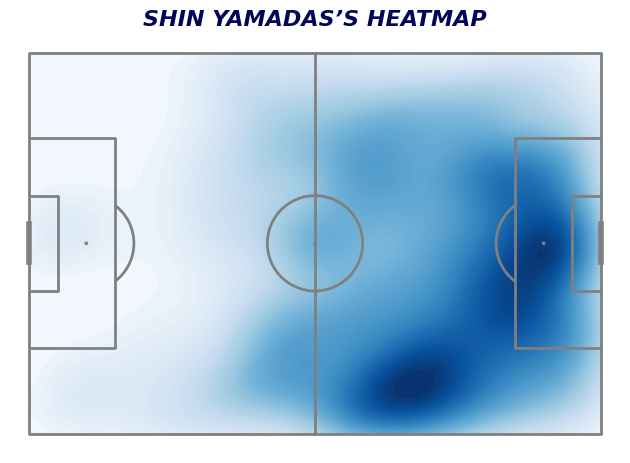

In [364]:
from mplsoccer import VerticalPitch
from mplsoccer import Pitch
import matplotlib.pyplot as plt

#Plotting

pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='grey', line_zorder=2)

fig, ax = pitch.draw()

# Create a heatmap
# All this is doing is creating a wrapper around seaborn's kdeplot
kde = pitch.kdeplot(
    player_df.x,
    player_df.y,
    fill=True, # This will fill the heatmap with color even if there are no events
    thresh=0,
    n_levels=100, # This adjusts the smoothness of the heatmap. The higher the number, the smoother the heatmap will be
    cut=10,
    cmap='Blues',
    ax=ax
)

# Let's add a title
ax.set_title('SHIN YAMADAS’S HEATMAP', fontsize=16, fontfamily='DejaVu Sans', fontstyle='italic', fontweight='bold', c='#000555')

In [366]:
fig.savefig('/Users/Trymso/Desktop/YAMADA.png', dpi=300, bbox_inches='tight')

In [30]:
# Passes and Carries

In [31]:
events_df.position.unique()

array([nan, 'Left Center Midfield', 'Left Center Back', 'Right Wing Back',
       'Left Back', 'Center Defensive Midfield', 'Right Midfield',
       'Right Center Forward', 'Left Wing Back', 'Goalkeeper',
       'Left Midfield', 'Right Center Midfield', 'Left Center Forward',
       'Right Center Back', 'Right Defensive Midfield',
       'Left Defensive Midfield', 'Center Back', 'Right Back',
       'Center Forward', 'Left Wing', 'Center Attacking Midfield',
       'Right Wing', 'Left Attacking Midfield',
       'Right Attacking Midfield', 'Substitute'], dtype=object)

In [32]:
# Define midfielder positions


centre_backs = ['Left Center Back', 'Right Center Back', 'Center Back']

full_backs = ['Right Wing Back', 'Left Back', 'Left Wing Back', 'Right Back']

def_midfield = ['Center Defensive Midfield', 'Right Defensive Midfield', 'Left Defensive Midfield']

midfielder_positions = [
    'Center Attacking Midfield', 'Right Center Midfield', 'Left Attacking Midfield',
    'Right Attacking Midfield', 'Right Midfield', 'Left Midfield'
]

attacking_midfield = ['Center Attacking Midfield']
center_forward = ['Center Forward']

# Filter for carries and midfielders
carries_df = events_df[(events_df['type'] == 'Carry') & (events_df['position'].isin(centre_backs))]

# Group by player and team, count carries
top_carriers = carries_df.groupby(['team', 'player']).size().reset_index(name='carries')

# Sort by carries in descending order
top_carriers = top_carriers.sort_values(by='carries', ascending=False)

# Display the top 20 players
top_carriers.head(15)


,team,player,carries
141,Urawa Reds,Marius Høibråten,2256
3,Albirex Niigata,Michael James Fitzgerald,1987
49,Gamba Osaka,Shinnosuke Nakatani,1675
5,Albirex Niigata,Thomas Deng,1555
150,Yokohama F. Marinos,Carlos Eduardo Bendini Giusti,1536
156,Yokohama F. Marinos,Takumi Kamijima,1424
108,Sanfrecce Hiroshima,Sho Sasaki,1318
24,Consadole Sapporo,Daihachi Okamura,1298
50,Gamba Osaka,Shota Fukuoka,1280
60,Kashima Antlers,Ikuma Sekigawa,1214


In [33]:
# Filter for carries and midfielders
carries_df = events_df[(events_df['type'] == 'Carry') & (events_df['position'].isin(centre_backs))]

# Calculate total minutes played by summing up the maximum minute for each match
player_minutes = events_df.groupby(['team', 'player', 'match_id'])['minute'].max().reset_index()
total_minutes = player_minutes.groupby(['team', 'player'])['minute'].sum().reset_index(name='total_minutes')

# Group by player and team, count carries
top_carriers = carries_df.groupby(['team', 'player']).size().reset_index(name='carries')

# Merge total minutes with top_carriers
top_carriers = top_carriers.merge(total_minutes, on=['team', 'player'])

# Calculate carries per 90 minutes
top_carriers['carries_per_90'] = (top_carriers['carries'] / top_carriers['total_minutes']) * 90

# Sort by carries_per_90 in descending order
top_carriers = top_carriers.sort_values(by='carries_per_90', ascending=False)

# Display the top 20 players
top_carriers.head(25)


,team,player,carries,total_minutes,carries_per_90
138,Urawa Reds,Alexander Scholz,931,1134,73.888889
3,Albirex Niigata,Michael James Fitzgerald,1987,2978,60.050369
141,Urawa Reds,Marius Høibråten,2256,3393,59.840849
2,Albirex Niigata,Kazuhiko Chiba,426,646,59.349845
142,Urawa Reds,Rikito Inoue,895,1499,53.735824
154,Yokohama F. Marinos,Shinnosuke Hatanaka,854,1434,53.598326
156,Yokohama F. Marinos,Takumi Kamijima,1424,2434,52.654067
150,Yokohama F. Marinos,Carlos Eduardo Bendini Giusti,1536,2633,52.502848
5,Albirex Niigata,Thomas Deng,1555,2759,50.724900
143,Urawa Reds,Yota Sato,912,1789,45.880380


In [34]:
# Safely split the 'location' column into 'x' and 'y' coordinates
events_df[['x', 'y']] = events_df['location'].apply(
    lambda loc: pd.Series(loc) if isinstance(loc, list) and len(loc) == 2 else pd.Series([None, None])
)

events_df[['carry_end_x', 'carry_end_y']] = events_df['carry_end_location'].apply(
    lambda loc: pd.Series(loc) if isinstance(loc, list) and len(loc) == 2 else pd.Series([None, None])
)

events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(
    lambda loc: pd.Series(loc) if isinstance(loc, list) and len(loc) == 2 else pd.Series([None, None])
)

In [35]:
# Filter for carries, midfielders, and locations in the opponent's half
carries_df = events_df[
    (events_df['type'] == 'Carry') &
    (events_df['position'].isin(centre_backs)) &
    (events_df['x'] > 50)  # Opponent's half condition
]

# Calculate total minutes played by summing up the maximum minute for each match
player_minutes = events_df.groupby(['team', 'player', 'match_id'])['minute'].max().reset_index()
total_minutes = player_minutes.groupby(['team', 'player'])['minute'].sum().reset_index(name='total_minutes')

# Group by player and team, count carries
top_carriers = carries_df.groupby(['team', 'player']).size().reset_index(name='carries')

# Merge total minutes with top_carriers
top_carriers = top_carriers.merge(total_minutes, on=['team', 'player'])

# Calculate carries per 90 minutes
top_carriers['carries_per_90'] = (top_carriers['carries'] / top_carriers['total_minutes']) * 90

# Sort by carries_per_90 in descending order
top_carriers = top_carriers.sort_values(by='carries_per_90', ascending=False)

# Display the top 20 players
top_carriers.head(20)


,team,player,carries,total_minutes,carries_per_90
108,Shonan Bellmare,Junnosuke Suzuki,538,1911,25.337520
132,Urawa Reds,Alexander Scholz,283,1134,22.460317
114,Shonan Bellmare,Naoya Takahashi,405,1724,21.142691
3,Albirex Niigata,Michael James Fitzgerald,688,2978,20.792478
150,Yokohama F. Marinos,Takumi Kamijima,516,2434,19.079704
148,Yokohama F. Marinos,Shinnosuke Hatanaka,298,1434,18.702929
112,Shonan Bellmare,Koki Tachi,56,272,18.529412
102,Sanfrecce Hiroshima,Sho Sasaki,691,3384,18.377660
9,Avispa Fukuoka,Kimiya Moriyama,17,86,17.790698
69,Kawasaki Frontale,Cesar Rafael Haydar Villarreal,38,195,17.538462


In [234]:
# Define the condition for progressive carries (25% closer to the opposition goal)
def is_progressive_carry(row):
    # Ensure both start and end x-coordinates exist
    if row['x'] is not None and row['carry_end_x'] is not None:
        # Calculate the percentage improvement toward the goal (100 on x-axis)
        progress_threshold = 0.25 * (120 - row['x'])  # 25% of remaining distance
        return row['carry_end_x'] >= row['x'] + progress_threshold
    return False

# Add a column to identify progressive carries
events_df['progressive_carry'] = events_df.apply(
    lambda row: is_progressive_carry(row) if row['type'] == 'Carry' else False,
    axis=1
)

# Filter for progressive carries and midfielders (adjust `centre_backs` to your positions of interest)
progressive_carries_df = events_df[
    (events_df['progressive_carry']) & (events_df['position'].isin(center_forward ))
]

# Calculate total minutes played by summing up the maximum minute for each match
player_minutes = events_df.groupby(['team', 'player', 'match_id'])['minute'].max().reset_index()
total_minutes = player_minutes.groupby(['team', 'player'])['minute'].sum().reset_index(name='total_minutes')

# Group by player and team, count progressive carries
top_progressive_carriers = progressive_carries_df.groupby(['team', 'player']).size().reset_index(name='progressive_carries')

# Merge total minutes with top_progressive_carriers
top_progressive_carriers = top_progressive_carriers.merge(total_minutes, on=['team', 'player'])

# Calculate progressive carries per 90 minutes
top_progressive_carriers['progressive_carries_per_90'] = (
    (top_progressive_carriers['progressive_carries'] / top_progressive_carriers['total_minutes']) * 90
)

# Sort by progressive_carries_per_90 in descending order
top_progressive_carriers = top_progressive_carriers.sort_values(by='progressive_carries_per_90', ascending=False)

# Display the top 25 players
top_progressive_carriers.head(20)


KeyError: 'x'

In [37]:
events_df.position.unique()

array([nan, 'Left Center Midfield', 'Left Center Back', 'Right Wing Back',
       'Left Back', 'Center Defensive Midfield', 'Right Midfield',
       'Right Center Forward', 'Left Wing Back', 'Goalkeeper',
       'Left Midfield', 'Right Center Midfield', 'Left Center Forward',
       'Right Center Back', 'Right Defensive Midfield',
       'Left Defensive Midfield', 'Center Back', 'Right Back',
       'Center Forward', 'Left Wing', 'Center Attacking Midfield',
       'Right Wing', 'Left Attacking Midfield',
       'Right Attacking Midfield', 'Substitute'], dtype=object)

In [38]:
events_df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'related_events', 'location',
       ...
       'shot_redirect', 'goalkeeper_success_out', 'goalkeeper_success_in_play',
       'x', 'y', 'carry_end_x', 'carry_end_y', 'pass_end_x', 'pass_end_y',
       'progressive_carry'],
      dtype='object', length=169)

In [39]:
matches_df.columns

Index(['match_id', 'match_date', 'kick_off', 'home_score', 'away_score',
       'behind_closed_doors', 'neutral_ground', 'collection_status',
       'play_status', 'match_status', 'match_status_360', 'last_updated',
       'last_updated_360', 'match_week', 'competition_competition_id',
       'competition_country', 'competition_competition', 'season_season_id',
       'season_season', 'home_team_home_team_id', 'home_team_home_team',
       'home_team_home_team_gender', 'home_team_home_team_youth',
       'home_team_managers', 'home_team_country_id', 'home_team_country',
       'away_team_away_team_id', 'away_team_away_team',
       'away_team_away_team_gender', 'away_team_away_team_youth',
       'away_team_managers', 'away_team_country_id', 'away_team_country',
       'metadata_data_version', 'metadata_shot_fidelity_version',
       'metadata_xy_fidelity_version', 'competition_stage_id',
       'competition_stage', 'stadium_id', 'stadium', 'stadium_country_id',
       'stadium_country

In [40]:
matches_df.play_status.unique()

array(['Normal'], dtype=object)

# Physical Data

In [42]:
# Load the JSON match data, inserting relevant file path
with open('/Users/Trymso/Desktop/J-League/hudl_physical.json') as f:
    p_data = json.load(f)

physical_df = pd.json_normalize(p_data)

In [43]:
# Load the mapping files
players_mapping = pd.read_csv("/Users/Trymso/Desktop/J-League/players_mapping.csv")
teams_mapping = pd.read_csv("/Users/Trymso/Desktop/J-League/teams_mapping.csv")
matches_mapping = pd.read_csv("/Users/Trymso/Desktop/J-League/matches_mapping.csv")

In [44]:
# Check data types of columns in physical_df
print(physical_df[['playerid', 'teamId', 'matchId']].dtypes)

# Check data types of columns in mapping files
print(players_mapping['wyscout_id'].dtypes)
print(teams_mapping['wyscout_id'].dtypes)
print(matches_mapping['wyscout_id'].dtypes)


playerid    object
teamId      object
matchId     object
dtype: object
int64
int64
int64


In [45]:
# Convert physical_df keys to integers
physical_df['playerid'] = physical_df['playerid'].astype(int)
physical_df['teamId'] = physical_df['teamId'].astype(int)
physical_df['matchId'] = physical_df['matchId'].astype(int)

In [46]:
# Merge player mapping
physical_df = pd.merge(
    physical_df,
    players_mapping,
    left_on="playerid",  # From physical_df
    right_on="wyscout_id",  # From players_mapping
    how="left"
)

# Merge team mapping
physical_df = pd.merge(
    physical_df,
    teams_mapping,
    left_on="teamId",  # From physical_df
    right_on="wyscout_id",  # From teams_mapping
    how="left"
)

# Merge match mapping
physical_df = pd.merge(
    physical_df,
    matches_mapping,
    left_on="matchId",  # From physical_df
    right_on="wyscout_id",  # From matches_mapping
    how="left"
)

In [47]:
physical_df.head()

,matchId,label,dateutc,teamId,teamName,playerid,player,metric,phase,value,statsbomb_id_x,wyscout_id_x,statsbomb_id_y,wyscout_id_y,statsbomb_id,wyscout_id
0,5551794,"Yokohama F. Marinos - Sagan Tosu, 0-1",2024-07-03 10:00:00,12798,Yokohama F. Marinos,299270,J. Amano,Count Medium Acceleration,Session,146.0,42145.0,299270.0,1880,12798,3925378,5551794
1,5551794,"Yokohama F. Marinos - Sagan Tosu, 0-1",2024-07-03 10:00:00,12798,Yokohama F. Marinos,299270,J. Amano,Count Medium Acceleration,1st Half,100.0,42145.0,299270.0,1880,12798,3925378,5551794
2,5551794,"Yokohama F. Marinos - Sagan Tosu, 0-1",2024-07-03 10:00:00,12798,Yokohama F. Marinos,299270,J. Amano,Count Medium Acceleration,2nd Half,46.0,42145.0,299270.0,1880,12798,3925378,5551794
3,5551794,"Yokohama F. Marinos - Sagan Tosu, 0-1",2024-07-03 10:00:00,12798,Yokohama F. Marinos,299270,J. Amano,Count Medium Acceleration,1'-15',30.0,42145.0,299270.0,1880,12798,3925378,5551794
4,5551794,"Yokohama F. Marinos - Sagan Tosu, 0-1",2024-07-03 10:00:00,12798,Yokohama F. Marinos,299270,J. Amano,Count Medium Acceleration,46'-60',37.0,42145.0,299270.0,1880,12798,3925378,5551794


In [48]:
# Rename statsbomb_id and wyscout_id columns
physical_df.rename(columns={
    "statsbomb_id": "player_statsbomb_id",  # From players_mapping
    "wyscout_id": "player_wyscout_id",
    "statsbomb_id_x": "team_statsbomb_id",  # From teams_mapping
    "wyscout_id_x": "team_wyscout_id",
    "statsbomb_id_y": "match_statsbomb_id",  # From matches_mapping
    "wyscout_id_y": "match_wyscout_id"
}, inplace=True)


In [49]:
# Merge events_df with the enriched physical_df
combined_df = pd.merge(
    events_df,
    physical_df,
    left_on=["player_id", "team_id", "match_id"],  # From events_df
    right_on=["player_statsbomb_id", "team_statsbomb_id", "match_statsbomb_id"],  # From physical_df
    how="left"  # Keep all events even if no physical data matches
)


In [50]:
# Merge events_df with the enriched physical_df
combined_df = pd.merge(
    events_df,
    physical_df,
    left_on=["player_id", "team_id", "match_id"],  # From events_df
    right_on=["player_statsbomb_id", "team_statsbomb_id", "match_statsbomb_id"],  # From physical_df
    how="left",  # Keep all events even if no physical data matches
    suffixes=('_events', '_physical')  # Avoid column conflicts
)

# Combine 'player' columns if both exist
if 'player_events' in combined_df.columns and 'player_physical' in combined_df.columns:
    combined_df['player'] = combined_df['player_events'].combine_first(combined_df['player_physical'])
    combined_df.drop(['player_events', 'player_physical'], axis=1, inplace=True)


In [51]:
combined_df.head()

,id,index,period,timestamp,minute,second,possession,duration,related_events,location,...,metric,phase,value,team_statsbomb_id,team_wyscout_id,match_statsbomb_id,match_wyscout_id,player_statsbomb_id,player_wyscout_id,player
0,dc1f3c18-004f-45d9-8f86-71d670f9cd97,1,1,00:00:00.000,0,0,1,0.0000,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8e81e4fd-fc8c-4efb-b9c4-6d2a55008d43,2,1,00:00:00.000,0,0,1,0.0000,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35110677-aaec-4db6-982d-63ae9e8f5f78,3,1,00:00:00.000,0,0,1,0.0000,133fd42b-056e-4634-9b32-86838cab760e,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,133fd42b-056e-4634-9b32-86838cab760e,4,1,00:00:00.000,0,0,1,0.0000,35110677-aaec-4db6-982d-63ae9e8f5f78,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20a0dc1c-0dde-41ac-b07b-ed0265e6a540,5,1,00:00:00.657,0,0,2,1.2832,4ff7ee07-01fb-44c0-b669-63b31f1145ba,"[60, 40]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yuki Soma


In [52]:
combined_df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'related_events', 'location',
       ...
       'metric', 'phase', 'value', 'team_statsbomb_id', 'team_wyscout_id',
       'match_statsbomb_id', 'match_wyscout_id', 'player_statsbomb_id',
       'player_wyscout_id', 'player'],
      dtype='object', length=184)

In [53]:
# Drop redundant columns from combined_df
combined_df.drop(columns=[
    "player_x", "player_y","player_statsbomb_id", "team_statsbomb_id", "match_statsbomb_id",
    "player_wyscout_id", "team_wyscout_id", "match_wyscout_id"
], inplace=True)

KeyError: "['player_x', 'player_y'] not found in axis"

In [ ]:
combined_df.columns

In [ ]:
physical_df.columns

In [ ]:
physical_df.metric.unique()

In [ ]:
combined_df.metric.unique()

# Machine Learning Model

In [ ]:
print(combined_df.columns.tolist())

In [ ]:
events_df.position.unique()

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Ensure the required columns are present in events_df
required_columns = [
    'shot_statsbomb_xg', 'shot_shot_execution_xg', 'pass_goal_assist',
    'obv_total_net', 'minute', 'shot_outcome', 'position', 'team', 'player', 'x', 'y'
]

# Verify columns in events_df
missing_columns = [col for col in required_columns if col not in events_df.columns]
if missing_columns:
    print(f"Missing columns in events_df: {missing_columns}")
else:
    print("All required columns are present in events_df.")

# Filter dataset for Center Forwards
center_forwards_df = events_df[events_df['position'] == 'Center Forward']

# Select relevant columns
selected_features = [
    'shot_statsbomb_xg', 'shot_shot_execution_xg', 'pass_goal_assist',
    'obv_total_net', 'minute', 'shot_outcome', 'player', 'team'
]

# Subset the dataset
center_forwards_df = center_forwards_df[selected_features].copy()
center_forwards_df.fillna(0, inplace=True)  # Handle missing values by filling with 0

# Calculate total minutes played by summing the maximum minute for each match
player_minutes = events_df.groupby(['team', 'player', 'match_id'])['minute'].max().reset_index()
total_minutes = player_minutes.groupby(['team', 'player'])['minute'].sum().reset_index(name='total_minutes')

# Merge total minutes into center_forwards_df
center_forwards_df = center_forwards_df.merge(total_minutes, on=['team', 'player'], how='left')

# Aggregate data by player and team
player_stats = center_forwards_df.groupby(['player', 'team']).agg({
    'shot_statsbomb_xg': 'sum',         # Total xG
    'shot_shot_execution_xg': 'sum',   # Total post-shot xG
    'pass_goal_assist': 'sum',         # Total assists
    'obv_total_net': 'sum',            # Total on-ball value
    'shot_outcome': lambda x: (x == 'Goal').sum(),  # Count goals
    'total_minutes': 'sum',            # Total minutes played
}).reset_index()

# Add derived metrics
player_stats['goals_per_90'] = (player_stats['shot_outcome'] / player_stats['total_minutes']) * 90
player_stats['xg_per_90'] = (player_stats['shot_statsbomb_xg'] / player_stats['total_minutes']) * 90
player_stats['assists_per_90'] = (player_stats['pass_goal_assist'] / player_stats['total_minutes']) * 90
player_stats['obv_per_90'] = (player_stats['obv_total_net'] / player_stats['total_minutes']) * 90

# Calculate a performance-to-value ratio (value_score)
player_stats['value_score'] = player_stats['goals_per_90'] / player_stats['xg_per_90']

# Define undervaluation: value_score > 1.2 (adjust threshold as needed)
player_stats['undervalued'] = player_stats['value_score'] > 1.2

# Features and target for machine learning
X = player_stats[['xg_per_90', 'assists_per_90', 'obv_per_90', 'total_minutes']]
y = player_stats['undervalued']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Predict undervaluation for all players
player_stats['undervaluation_prob'] = model.predict_proba(X)[:, 1]

# Sort players by undervaluation probability
undervalued_players = player_stats.sort_values(by='undervaluation_prob', ascending=False)

# Display top 10 undervalued players
#print("Top 10 Undervalued Players:")
undervalued_players[['player', 'team', 'value_score', 'undervaluation_prob']].head(10)


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Ensure relevant columns are present
required_columns = [
    'shot_statsbomb_xg', 'shot_shot_execution_xg', 'pass_goal_assist',
    'obv_total_net', 'minute', 'shot_outcome', 'position', 'team', 'player', 'x', 'y',
    'pass_shot_assist', 'carry_end_location'
]

missing_columns = [col for col in required_columns if col not in events_df.columns]
if missing_columns:
    print(f"Missing columns in events_df: {missing_columns}")
else:
    print("All required columns are present in events_df.")

# Filter dataset for Center Forwards
center_forwards_df = events_df[events_df['position'] == 'Center Forward']

# Select relevant columns
selected_features = [
    'shot_statsbomb_xg', 'shot_shot_execution_xg', 'pass_goal_assist',
    'obv_total_net', 'minute', 'shot_outcome', 'player', 'team', 'pass_shot_assist', 'x', 'y', 'carry_end_location'
]

center_forwards_df = center_forwards_df[selected_features].copy()
center_forwards_df.fillna(0, inplace=True)  # Handle missing values by filling with 0

# Calculate total minutes played
player_minutes = events_df.groupby(['team', 'player', 'match_id'])['minute'].max().reset_index()
total_minutes = player_minutes.groupby(['team', 'player'])['minute'].sum().reset_index(name='total_minutes')

# Merge total minutes into center_forwards_df
center_forwards_df = center_forwards_df.merge(total_minutes, on=['team', 'player'], how='left')

# Aggregate data by player and team
player_stats = center_forwards_df.groupby(['player', 'team']).agg({
    'shot_statsbomb_xg': 'sum',
    'shot_shot_execution_xg': 'sum',
    'pass_goal_assist': 'sum',
    'obv_total_net': 'sum',
    'pass_shot_assist': 'sum',  # Total shot assists
    'shot_outcome': lambda x: (x == 'Goal').sum(),
    'total_minutes': 'sum'
}).reset_index()

# Add derived metrics
player_stats['goals_per_90'] = (player_stats['shot_outcome'] / player_stats['total_minutes']) * 90
player_stats['xg_per_90'] = (player_stats['shot_statsbomb_xg'] / player_stats['total_minutes']) * 90
player_stats['assists_per_90'] = (player_stats['pass_goal_assist'] / player_stats['total_minutes']) * 90
player_stats['obv_per_90'] = (player_stats['obv_total_net'] / player_stats['total_minutes']) * 90
player_stats['shot_assists_per_90'] = (player_stats['pass_shot_assist'] / player_stats['total_minutes']) * 90

# Define performance-to-value ratio (value_score)
player_stats['value_score'] = player_stats['goals_per_90'] / player_stats['xg_per_90']

# Define undervaluation (adjust threshold as needed)
player_stats['undervalued'] = player_stats['value_score'] > 1.2

# Features and target
X = player_stats[['xg_per_90', 'assists_per_90', 'obv_per_90', 'shot_assists_per_90', 'total_minutes']]
y = player_stats['undervalued']

# Address class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Predict undervaluation for all players
player_stats['undervaluation_prob'] = model.predict_proba(X)[:, 1]

# Sort players by undervaluation probability
undervalued_players = player_stats.sort_values(by='undervaluation_prob', ascending=False)

# Display top 10 undervalued players
print("Top 10 Undervalued Players:")
print(undervalued_players[['player', 'team', 'value_score', 'undervaluation_prob']].head(10))

# Visualization (scatter plot of value_score vs. xg_per_90)
import matplotlib.pyplot as plt
plt.scatter(player_stats['xg_per_90'], player_stats['value_score'], alpha=0.6, label="Players")
plt.xlabel('xG per 90')
plt.ylabel('Value Score')
plt.title('Value Score vs. xG per 90')
plt.axhline(y=1.2, color='red', linestyle='--', label="Undervaluation Threshold")
plt.legend()
plt.show()


In [ ]:
events_df.pass_shot_assist.unique()

In [ ]:
combined_df

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Ensure relevant columns are present
required_columns = [
    'shot_statsbomb_xg', 'shot_shot_execution_xg', 'pass_goal_assist',
    'obv_total_net', 'minute', 'shot_outcome', 'position', 'team', 'player', 'x', 'y',
    'pass_shot_assist', 'carry_end_location'
]

missing_columns = [col for col in required_columns if col not in events_df.columns]
if missing_columns:
    print(f"Missing columns in events_df: {missing_columns}")
else:
    print("All required columns are present in events_df.")

# Filter dataset for Center Attacking Midfield players
cam_df = events_df[events_df['position'] == 'Center Attacking Midfield']

# Select relevant columns
selected_features = [
    'shot_statsbomb_xg', 'shot_shot_execution_xg', 'pass_goal_assist',
    'obv_total_net', 'minute', 'shot_outcome', 'player', 'team', 'pass_shot_assist', 'x', 'y', 'carry_end_location'
]

cam_df = cam_df[selected_features].copy()
cam_df.fillna(0, inplace=True)  # Handle missing values by filling with 0

# Calculate total minutes played
player_minutes = events_df.groupby(['team', 'player', 'match_id'])['minute'].max().reset_index()
total_minutes = player_minutes.groupby(['team', 'player'])['minute'].sum().reset_index(name='total_minutes')

# Merge total minutes into cam_df
cam_df = cam_df.merge(total_minutes, on=['team', 'player'], how='left')

# Aggregate data by player and team
player_stats = cam_df.groupby(['player', 'team']).agg({
    'shot_statsbomb_xg': 'sum',
    'shot_shot_execution_xg': 'sum',
    'pass_goal_assist': 'sum',
    'obv_total_net': 'sum',
    'pass_shot_assist': 'sum',  # Total shot assists
    'shot_outcome': lambda x: (x == 'Goal').sum(),
    'total_minutes': 'sum'
}).reset_index()

# Add derived metrics
player_stats['goals_per_90'] = (player_stats['shot_outcome'] / player_stats['total_minutes']) * 90
player_stats['xg_per_90'] = (player_stats['shot_statsbomb_xg'] / player_stats['total_minutes']) * 90
player_stats['assists_per_90'] = (player_stats['pass_goal_assist'] / player_stats['total_minutes']) * 90
player_stats['obv_per_90'] = (player_stats['obv_total_net'] / player_stats['total_minutes']) * 90
player_stats['shot_assists_per_90'] = (player_stats['pass_shot_assist'] / player_stats['total_minutes']) * 90

# Define performance-to-value ratio (value_score)
player_stats['value_score'] = player_stats['goals_per_90'] / player_stats['xg_per_90']

# Define undervaluation (adjust threshold as needed)
player_stats['undervalued'] = player_stats['value_score'] > 1.2

# Features and target
X = player_stats[['xg_per_90', 'assists_per_90', 'obv_per_90', 'shot_assists_per_90', 'total_minutes']]
y = player_stats['undervalued']

# Address class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Predict undervaluation for all players
player_stats['undervaluation_prob'] = model.predict_proba(X)[:, 1]

# Sort players by undervaluation probability
undervalued_players = player_stats.sort_values(by='undervaluation_prob', ascending=False)

# Display top 10 undervalued players
print("Top 10 Undervalued Players:")
print(undervalued_players[['player', 'team', 'value_score', 'undervaluation_prob']].head(10))

# Visualization (scatter plot of value_score vs. assists_per_90)
import matplotlib.pyplot as plt
plt.scatter(player_stats['assists_per_90'], player_stats['value_score'], alpha=0.6, label="Players")
plt.xlabel('Assists per 90')
plt.ylabel('Value Score')
plt.title('Value Score vs. Assists per 90 (Center Attacking Midfield)')
plt.axhline(y=1.2, color='red', linestyle='--', label="Undervaluation Threshold")
plt.legend()
plt.show()


# Transfermarkt Valuations

In [76]:
#event data Japan
events_df.head()

,id,index,period,timestamp,minute,second,possession,duration,related_events,location,...,shot_redirect,goalkeeper_success_out,goalkeeper_success_in_play,x,y,carry_end_x,carry_end_y,pass_end_x,pass_end_y,progressive_carry
0,dc1f3c18-004f-45d9-8f86-71d670f9cd97,1,1,00:00:00.000,0,0,1,0.0000,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,8e81e4fd-fc8c-4efb-b9c4-6d2a55008d43,2,1,00:00:00.000,0,0,1,0.0000,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,35110677-aaec-4db6-982d-63ae9e8f5f78,3,1,00:00:00.000,0,0,1,0.0000,133fd42b-056e-4634-9b32-86838cab760e,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,133fd42b-056e-4634-9b32-86838cab760e,4,1,00:00:00.000,0,0,1,0.0000,35110677-aaec-4db6-982d-63ae9e8f5f78,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,20a0dc1c-0dde-41ac-b07b-ed0265e6a540,5,1,00:00:00.657,0,0,2,1.2832,4ff7ee07-01fb-44c0-b669-63b31f1145ba,"[60, 40]",...,NaN,NaN,NaN,60.0,40.0,NaN,NaN,39.5,32.6,False


In [79]:
pv = pd.read_csv('/Users/Trymso/Desktop/tm/player_valuations.csv')
pv.head()


,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1


In [81]:
pv.columns

Index(['player_id', 'date', 'market_value_in_eur', 'current_club_id',
       'player_club_domestic_competition_id'],
      dtype='object')

In [83]:
players = pd.read_excel('/Users/Trymso/Desktop/tm/Players_tm.xlsx')
players.head()

,StatsBombPlayerName,StatsBombPlayerId,TransfermarktPlayerId,TransfermarktPlayerName,TransfermarktPlayerFullName,WyscoutPlayerName,WyscoutPlayerId
0,Aaron Cresswell,3062.0,92571,Aaron Cresswell,Aaron Cresswell,Aaron Cresswell,8582.0
1,Aaron Hughes,20059.0,3580,Aaron Hughes,Aaron William Hughes,Aaron Hughes,11135.0
2,Aaron Hunt,8308.0,4687,Aaron Hunt,Aaron Hunt,Aaron Hunt,14706.0
3,Aaron Lennon,3953.0,14221,Aaron Lennon,Aaron Justin Lennon,Aaron Lennon,8284.0
4,Aarón Martín Caricol,6757.0,251878,Aarón Martín,Aarón Martín Caricol,Aarón Martín Caricol,282438.0


In [ ]:
players.columns

In [85]:
# Perform the merge
merged_df = pv.merge(players, left_on='player_id', right_on='TransfermarktPlayerId', how='inner', suffixes=('', '_dup'))

# Drop duplicate columns resulting from the merge
columns_to_drop = [col for col in merged_df.columns if col.endswith('_dup')]
merged_df = merged_df.drop(columns=columns_to_drop)

# Display the resulting merged dataframe
merged_df.head(20)


,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id,StatsBombPlayerName,StatsBombPlayerId,TransfermarktPlayerId,TransfermarktPlayerName,TransfermarktPlayerFullName,WyscoutPlayerName,WyscoutPlayerId
0,342216,2001-07-20,100000,1241,SC1,NaN,NaN,342216,Julien Serrano,Julien Serrano,Julien Serrano,472126.0
1,342216,2017-07-01,100000,1241,SC1,NaN,NaN,342216,Julien Serrano,Julien Serrano,Julien Serrano,472126.0
2,342216,2018-01-24,100000,1241,SC1,NaN,NaN,342216,Julien Serrano,Julien Serrano,Julien Serrano,472126.0
3,342216,2018-06-04,2000000,1241,SC1,NaN,NaN,342216,Julien Serrano,Julien Serrano,Julien Serrano,472126.0
4,342216,2018-12-17,2000000,1241,SC1,NaN,NaN,342216,Julien Serrano,Julien Serrano,Julien Serrano,472126.0
5,342216,2019-06-03,1500000,1241,SC1,NaN,NaN,342216,Julien Serrano,Julien Serrano,Julien Serrano,472126.0
6,342216,2019-12-13,1000000,1241,SC1,NaN,NaN,342216,Julien Serrano,Julien Serrano,Julien Serrano,472126.0
7,342216,2020-04-08,900000,1241,SC1,NaN,NaN,342216,Julien Serrano,Julien Serrano,Julien Serrano,472126.0
8,342216,2021-01-18,900000,1241,SC1,NaN,NaN,342216,Julien Serrano,Julien Serrano,Julien Serrano,472126.0
9,342216,2021-06-04,750000,1241,SC1,NaN,NaN,342216,Julien Serrano,Julien Serrano,Julien Serrano,472126.0


In [87]:
# Ensure the 'date' column is in datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Sort by player_id and date (most recent first)
merged_df = merged_df.sort_values(by=['player_id', 'date'], ascending=[False, False])

# Drop duplicates, keeping only the most recent entry for each player_id
most_recent_df = merged_df.drop_duplicates(subset=['player_id'], keep='first')

In [89]:
most_recent_df.head()

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id,StatsBombPlayerName,StatsBombPlayerId,TransfermarktPlayerId,TransfermarktPlayerName,TransfermarktPlayerFullName,WyscoutPlayerName,WyscoutPlayerId
163937,1108145,2024-06-03,1500000,3524,FR1,Cheick Oumar Konaté,374052.0,1108145,Cheick Oumar Konaté,Cheick Oumar Konaté,NaN,NaN
163932,1053240,2023-06-27,900000,1147,FR1,Moussa Soumano,350488.0,1053240,Moussa Soumano,Moussa Soumano,NaN,NaN
163803,1012534,2024-12-16,28000000,1237,GB1,Yankuba Minteh,307271.0,1012534,Yankuba Minteh,Yankuba Minteh,NaN,NaN
163895,982855,2024-12-18,10000000,276,IT1,Reda Belahyane,142322.0,982855,Reda Belahyane,Reda Belahyane,NaN,NaN
163811,982575,2024-12-19,10000000,3329,PO1,Gustavo Nery De Sá Da Silva,26499.0,982575,Gustavo Sá,Gustavo Filipe Alves de Freitas Azevedo e Sá,NaN,NaN


In [ ]:
new_df = most_recent_df.merge(events_df, left_on='StatsBombPlayerId', right_on='player_id' how='inner', suffixes=('', '_dup'))

In [ ]:
# Perform the merge between most_recent_df and events_df
new_df = most_recent_df.merge(
    events_df, 
    left_on='StatsBombPlayerId', 
    right_on='player_id', 
    how='inner', 
    suffixes=('', '_dup')
)

# Drop duplicate columns created during the merge
columns_to_drop = [col for col in new_df.columns if col.endswith('_dup')]
new_df = new_df.drop(columns=columns_to_drop)

# Optionally reorder the columns for better readability
new_df = new_df.loc[:, ~new_df.columns.duplicated()]  # Ensure no duplicated columns


In [ ]:
new_df.head()

In [368]:
events_df.shot_statsbomb_xg.unique()

array([   nan, 0.0086, 0.0755, ..., 0.0845, 0.1907, 0.1792])

In [370]:
shots_df = events_df[events_df['type'] == 'Shot']

In [374]:
shots_df[['x', 'y']] = shots_df['location'].apply(
    lambda loc: pd.Series(loc) if isinstance(loc, list) and len(loc) == 2 else pd.Series([None, None])
)

/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_1962/3639160442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_df[['x', 'y']] = shots_df['location'].apply(


In [380]:
df_shots = shots_df[['player_id', 'player', 'position', 'type', 'shot_outcome', 'x', 'y']]
df_shots.head()

,player_id,player,position,type,shot_outcome,x,y
72,43053.0,Yuta Higuchi,Left Midfield,Shot,Off T,None,None
100,23518.0,Ibrahim Dresevic,Right Center Back,Shot,Off T,None,None
109,391902.0,Shu Morooka,Right Center Forward,Shot,Goal,None,None
154,41144.0,Se-Hun Oh,Left Center Forward,Shot,Saved,None,None
256,43053.0,Yuta Higuchi,Right Midfield,Shot,Goal,None,None
